# Migration to realtime output mode

Date: 2023/10/24

In [1]:
import numpy as np
import serial
from scipy.io import wavfile
import matplotlib.pyplot as plt
import time
import traceback

PORT = 'COM6'
BAUDRATE = 460800
RAW_WAVE = b'r'
SFFT = b's'
FEATURES = b'f'
TX_ON = b'o'
TX_OFF = b'O'

Fs = int(80000000 / 64 / 64)

NUM_SAMPLES = 512
NUM_SAMPLES_HALF = 256
NUM_FILTERS = 40

NUM_REPEAT = 200

'Fs: {} Hz'.format(Fs)

'Fs: 19531 Hz'

In [2]:
b16_to_int = lambda msb, lsb, signed: int.from_bytes([msb, lsb], byteorder='big', signed=signed)

In [3]:
# Fetch two SFFTs at once
def fetchSFFT():
    try:
        ser.close()
    except:
        print('Already closed')
    
    ser = serial.Serial('COM6', BAUDRATE)
    try:
        ser.write(SFFT)
        ser.write(TX_ON)
        
        data = ser.read(NUM_SAMPLES_HALF * 2)
        ser.write(TX_OFF)
        ser.close()
        
    except:
        traceback.print_exc()
        ser.write(TX_OFF)
        ser.close()
        
    data = np.frombuffer(data, dtype=np.int8)
    return data.reshape(2,NUM_SAMPLES_HALF)

Already closed


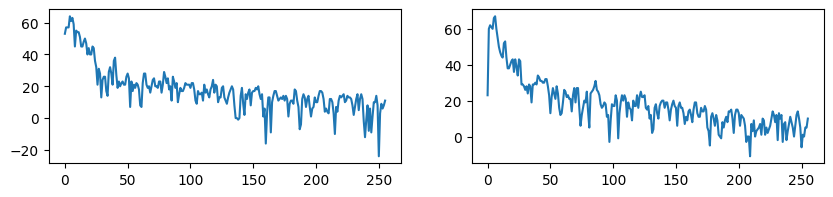

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10,2))
data = fetchSFFT()
axes[0].plot(data[0])
axes[1].plot(data[1])

In [5]:
data

array([[ 53,  57,  57,  57,  64,  61,  63,  59,  45,  55,  54,  54,  51,
         45,  45,  48,  50,  47,  40,  44,  40,  40,  45,  44,  36,  32,
         21,  31,  28,  13,  24,  26,  26,  17,  14,  29,  32,  28,  21,
         36,  38,  27,  19,  23,  20,  22,  23,  21,  21,  26,  28,  25,
          7,  23,  17,  21,  19,  22,  21,  18,   8,   7,  22,  28,  28,
         21,  19,  20,  16,  20,  24,  25,  20,  20,  19,  23,  23,  16,
         21,  29,  26,  22,  25,  18,  20,  11,  26,  23,  19,  22,  10,
         15,  19,  17,  17,  19,  22,  21,  21,  21,  19,  22,  22,  18,
         11,   9,  17,  15,  15,  16,  11,  21,  16,  18,  15,  13,  18,
         20,  24,  16,  21,  20,  10,  13,  13,  19,  20,  13,  11,   9,
         13,  16,  18,  20,  18,   8,   0,   0,  -1,   0,  14,  19,   9,
          2,  15,  12,  16,  18,   8,  16,  17,  17,  19,  18,  20,  15,
         12,  15,   1,   6, -16,   3,  13,  13,  -9,  10,  14,  17,  17,
         14,  11,  12,  13,  12,  14,  11,  14,  12

In [6]:
def fetchSpectrogram():
    try:
        ser.close()
    except:
        print('Already closed')
    
    ser = serial.Serial('COM6', BAUDRATE)
    
    try:
        ser.write(SFFT)
        ser.write(TX_ON)
        
        data = ser.read(NUM_SAMPLES_HALF * 200)
        ser.write(TX_OFF)
        ser.close()
        
    except:
        traceback.print_exc()
        ser.write(TX_OFF)
        ser.close()
        
    data = np.frombuffer(data, dtype=np.int8)
    return data.reshape(200, NUM_SAMPLES_HALF)

In [7]:
spec = fetchSpectrogram()
spec

Already closed


array([[56, 65, 69, ...,  7, 11,  9],
       [53, 51, 59, ...,  8,  7,  1],
       [50, 58, 64, ..., 10,  9,  3],
       ...,
       [66, 66, 64, ..., 10,  4, 11],
       [50, 61, 53, ..., 13, 14,  6],
       [48, 64, 64, ..., 11,  9, 11]], dtype=int8)

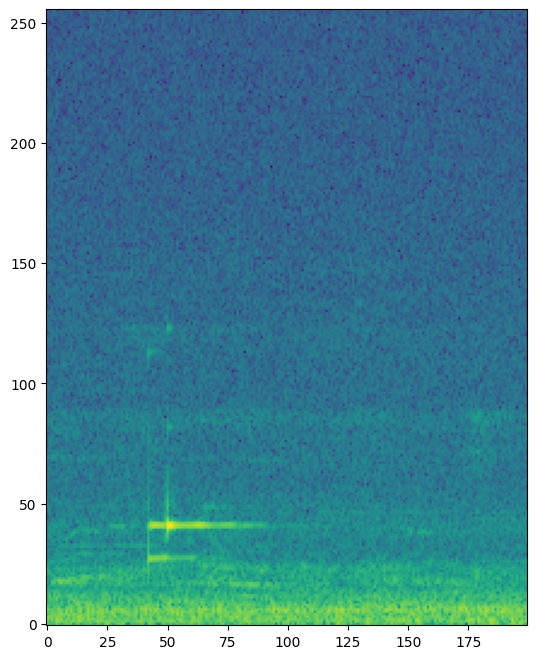

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(spec.T)
ax.invert_yaxis()

In [9]:
spec.reshape(200, NUM_SAMPLES_HALF)[0]

array([ 7, 19, 10,  3, 13, 18, 14,  1, 20, 21, 25, 17, 13, 15, 13, 17,  3,
       17, 18, 13, 25, 24, 18, 12,  4, 27, 35, 32, 24, 23, 20, 12, 16, 17,
       23, 25, 21, 15, 12,  8, 10, 17, 20, 18,  3, 20, 18, 14, 16, 15, 14,
        9, 10, 10, 12, 17,  8, 21, 15, 18, 17,  1, 12, 16, 29, 40, 38, 24,
       15, 19, 13,  8, 12, 17, 18, 13,  9, 18, 11, 11,  3, 10,  4, 11,  7,
        8, 17, 22, 19, 16, 17, 15, 24, 23, 15, 10, 18, 19, 17, 16, 19, 22,
       20, 10, 13, 12, 10, 18, 19, 19, 20, 20, 21, 15, 14, 22, 21, 15,  9,
       12, 16, 14, 14, 11, -4, 13, 20,  8, 22, 21, 13, 11, 20, 19, 14, 14,
       15, 20, 17,  8, 14, 16, 12, 10, 18, 19,  5, 18, 22, 23, 16,  9, 20,
       23, 16, 13, 19, 17, 12, 17, 19, 14, 14, 18, 14, 17, 15, 11, 15, 13,
       12,  5,  0, 20, 21, 13, 23, 15, 15, 13, 10, 19, 18, 11, 12,  9, 12,
       11, 20, 19, 10, 11, 18, 14, 14, 14, 15, 14, 15, 14, 12, 18, 11, 10,
       19, 19, 18, 21, 19, 13, 13, 15, 14,  7, 15, 12, 17,  3, 13,  6, 16,
       20, 16, 13, 20, 23

In [10]:
def fetchFeatures():
    try:
        ser.close()
    except:
        print('Already closed')
    
    ser = serial.Serial('COM6', BAUDRATE)
    
    try:
        ser.write(FEATURES)
        ser.write(TX_ON)
        data = ser.read(NUM_FILTERS*2*200)
        ser.write(TX_OFF)
        ser.close()
        
    except:
        traceback.print_exc()
        ser.write(TX_OFF)
        ser.close()
        
    data = np.frombuffer(data, dtype=np.int8)
    data = data.reshape(200,NUM_FILTERS*2)
    return data[:,0:NUM_FILTERS], data[:,NUM_FILTERS:NUM_FILTERS*2]  # MFSCs, MFCCs

In [14]:
s, c = fetchFeatures()

Already closed


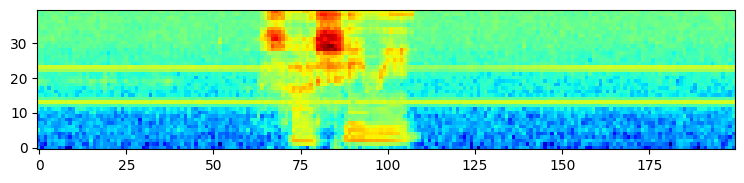

In [15]:
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(s.T, cmap='jet')
ax.invert_yaxis()

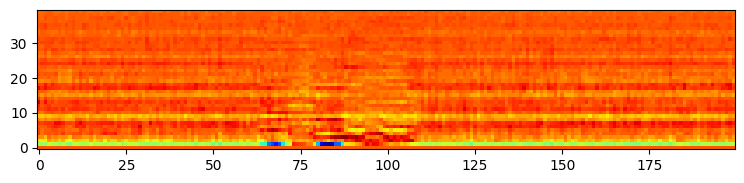

In [16]:
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(c.T, cmap='jet')
ax.invert_yaxis()